<a href="https://colab.research.google.com/github/Asmaaad37/Machine-Learning/blob/main/CNN_GAN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 DataSet

**This Dataset basically consisits of images that are categorized into 10 different classes.**

I'll be Implementing a CNN and try to classify these images to their respective classes.

In [ ]:
# Importing the required libraries.
import pandas as pd  # for data wrangling and some data exploration
import keras as k # for our CNN Model
import numpy as np  # for mathematical exploration
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

In [ ]:
# let's load our  DataSet
(train_images, train_labels), (test_images, test_labels) = k.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Let's start some exploration on out dataset, i'll start with their shapes.
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Now, what we can extract from this data:

**1:** `train_images.shape` - (50000, 32, 32, 3)

`50000` - Number of training images.

`32x32` - Images Resolution.

`3` - Number of color channels (RGB).

**2:** `train_labels.shape` - (50000, 1)

`50000` - Number of labels (one for each image).

`1` - Each label is and integer representing the class (0-9).



In [ ]:
# # Count occurrences of each label
# class_counts = np.bincount(train_labels.flatten())
# class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# # Plot class distribution
# plt.figure(figsize=(10, 5))
# plt.bar(class_names, class_counts, color='skyblue')
# plt.xlabel("Class")
# plt.ylabel("Number of Images")
# plt.title("Distribution of CIFAR-10 Training Data")
# plt.xticks(rotation=45)
# plt.show()

We can use the above cell when our training labels will be in the integer format, they are still `one-hot encoded` which is causing `np.bincount(train_labels.flatten())` to give incorrect result.

In [ ]:
# Storing the names of the 10 classes present in our dataset.
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

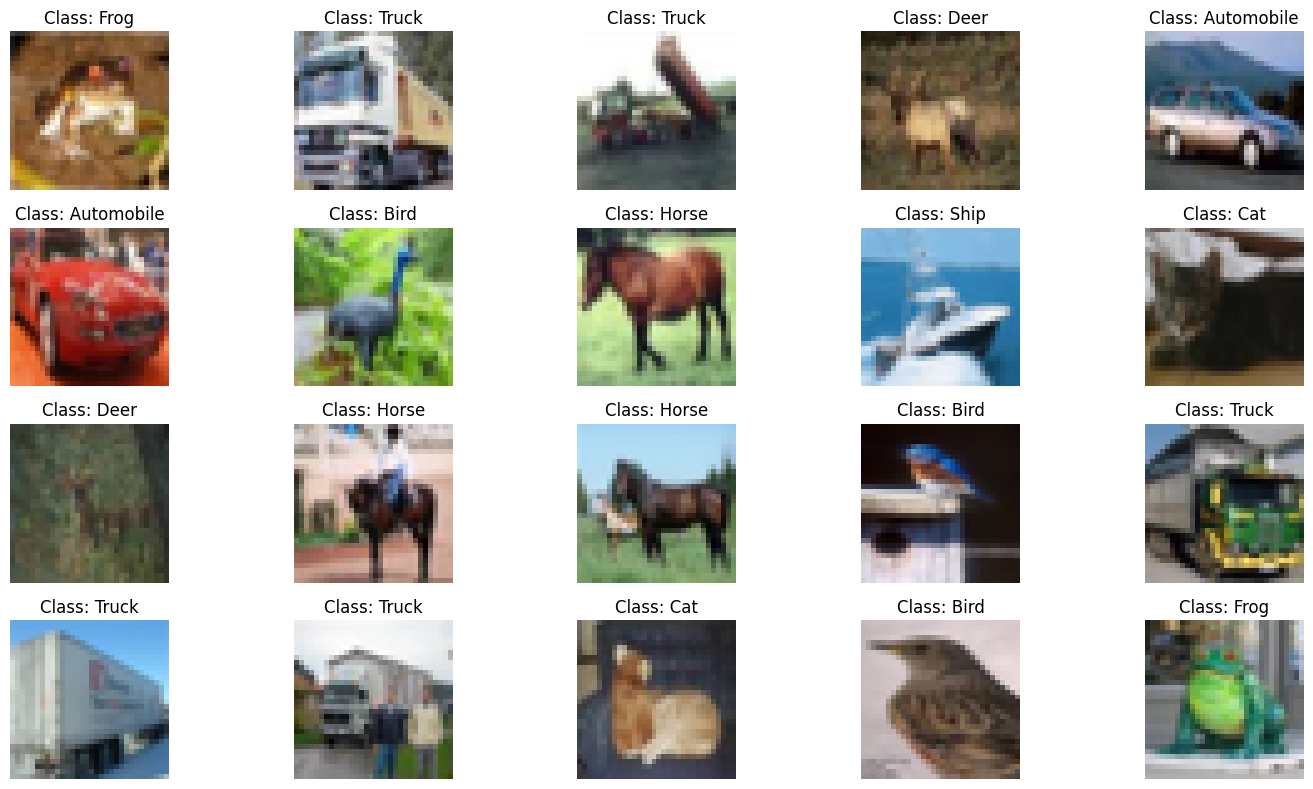

In [ ]:
# Displaying the first 20 images from our training dataset.
plt.figure(figsize=(15, 8))

for i, (image, label) in enumerate(zip(train_images[:20], train_labels[:20])):
    plt.subplot(4, 5, i + 1) # 4 rows, 5 columns for better fit.
    plt.imshow(image)
    plt.title(f"Class: {class_names[label[0]]}")
    plt.axis("off")

plt.tight_layout()
plt.show();

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical # Converts class labels (e.g; 0-9) into one-hot encoded vectors

In [ ]:
# Apply Data Augmentation (Improves Generalization in GANs and CNNs)
# Augmentation + Preprocessing for Training Data:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Preprocessing for Testing Set(Only Rescaling)

datagente = ImageDataGenerator(
    rescale=1./255,
)

**Why No Augmentation for Testing?**

1: Augmentation is only applied to training data to increase dataset diversity.

2: The test set should represent real-world unseen data, so we only normalize it.


In [ ]:
# Fitting the generator on the training data.
datagen.fit(train_images)

# Creating a Generator that yields augmented images for the training data.
train_data_generator = datagen.flow(train_images, train_labels, batch_size=32)

# let's fit the Generator on the testing data.
datagente.fit(test_images)
test_data_generator = datagente.flow(test_images, test_labels, batch_size=32)

Text(0.5, 1.0, 'Class: Airplane')

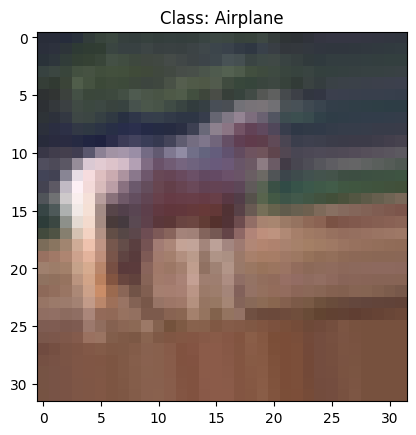

In [ ]:
# For confirmation let's print out batch of out sample augmented images.
batch_images, batch_labels = next(train_data_generator)
plt.imshow(batch_images[0])   # Show the first image in our batch
plt.title(f"Class: {class_names[batch_labels[0].argmax()]}")

Text(0.5, 1.0, 'Class: Airplane')

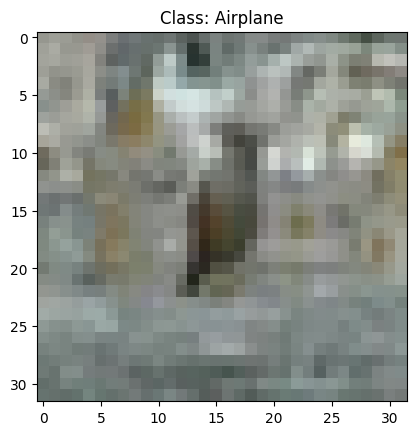

In [ ]:
# For Testing Data.
batch_images, batch_labels = next(test_data_generator)
plt.imshow(batch_images[0])  # Show the first image in the batch
plt.title(f"Class: {class_names[batch_labels[0].argmax()]}")

# CNN(Convolutional Neural Network)

In [ ]:
# Importing Callbacks from keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import layers, models

lr_reduction_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=10)
# I'll use `EarlyStopping` after checking the model if it's overfitting or not!

`EarlyStopping` -  helps avoid overfitting by stopping training if the model isn't improving.

`ReduceLROnPlateau` - It reduces the **learning rate** when the model stops improving, which helps the model fine-tune itself.


# CNN Architecture

**Model Overview:**

*   **Convolutional Layers:** 5 layers, progressively reducing spatial dimensions and learning features at various levels.
*   **Fully Connected Layers:** 3 dense layers to classify the learned features into the final output.
*   **Dropout:** Used extensively to prevent overfitting.
*  **Batch Normalization:** Helps stabilize training and makes it faster.
*  **MaxPooling:** Reduces spatial dimensions and keeps the most important information.







In [ ]:
# Instantiating the model.
model = models.Sequential()

# Adding layers in our CNN model.
# CNN Layer 1:
model.add(layers.Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

# CNN Layer 2
model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

# CNN Layer 3
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.3))

# CNN Layer 4
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# CNN Layer 5
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.5))


# Adding a Flatten Layer
model.add(layers.Flatten()) #Converts the 2D feature maps into a 1D vector.

# Now, Dense Layers
# Dense Layer 1
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))

# Dense Layer 2
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

# Dense Layer 3
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# Setting up the Output Layer - with 10 neurons(1 for each class)
model.add(layers.Dense(10, activation='softmax'));

In [ ]:
# Let's check out the architecture of out Model.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 3,659,466 (13.96 MB)

 Trainable params: 3,657,802 (13.95 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
# Let's train, test and evaluate our model performance.
learningRate = 0.001
adam_optimizer = k.optimizers.Adam(learning_rate=learningRate)
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to one-hot encoding
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Updating Data generators to use one-hot encoded labels
train_data_generator = datagen.flow(train_images, train_labels_onehot, batch_size=32)
test_data_generator = datagente.flow(test_images, test_labels_onehot, batch_size=32)


training_history = model.fit(train_data_generator, epochs=50, validation_data=test_data_generator, callbacks=[lr_reduction_callback]);


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  30/1563 ━━━━━━━━━━━━━━━━━━━━ 1:27:12 3s/step - accuracy: 0.1240 - loss: 4.7579

KeyboardInterrupt: 